In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense


In [2]:
from google.colab import files
uploaded = files.upload()

Saving bankloan.csv to bankloan.csv


In [3]:
df = pd.read_csv('bankloan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(480, 13)

In [8]:
df = df.drop('Loan_ID',axis=1)

In [9]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)

In [11]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [12]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))
dm_X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [13]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [16]:
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_resample(dm_X, dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [17]:
Counter(y)

Counter({0: 332, 1: 332})

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

In [36]:
classifier = Sequential()
classifier.add(Dense(200,activation='relu',kernel_initializer='random_normal',input_dim = X_test.shape[1]))
classifier.add(Dense(400, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=100,verbose=0)
eval_model = classifier.evaluate(X_train,y_train)
eval_model


17/17 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9134


[0.2046627253293991, 0.9133710265159607]

In [37]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.52)


5/5 [==============================] - 0s 3ms/step


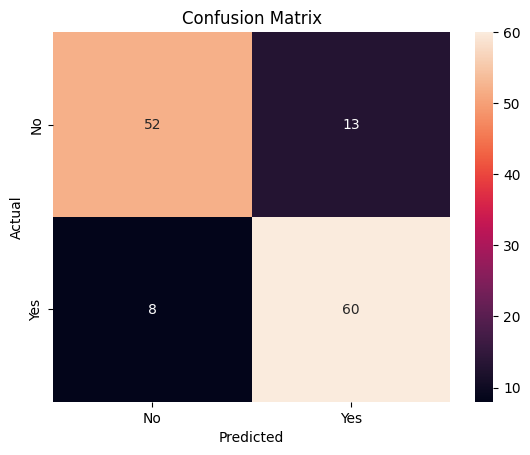

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']);
ax.yaxis.set_ticklabels(['No','Yes']);


In [40]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)


['loan_model.pkl']

In [44]:
random_data = dm_X.sample(n=19)
random_data.to_excel('test_loan.xlsx')

In [41]:
mdl = joblib.load('loan_model.pkl')
